#PREDICTION OF PROPERTY TAX USING KNN CLASSIFICATION & LINEAR REGRESSION

##***LIBRARY IMPORTS AND DATA LOADING***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/raw_house_data.csv")

##***EXPLORATORY DATA ANALYSIS***

In [ ]:
#Read the data
data

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2,7300,0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3,None,None,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",None
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5,9019,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",None
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6,6396,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3,3601,3,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",None
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3,2318,3,"Dishwasher, Double Sink, Electric Range, Garba...",1,"Carpet, Ceramic Tile",43
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2,1772,0,"Dishwasher, Electric Range, Island, Refrigerat...",0,Ceramic Tile,None
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4,3724,3,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",None


In [ ]:
#View information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   int64  
 3   longitude         5000 non-null   float64
 4   latitude          5000 non-null   float64
 5   lot_acres         4990 non-null   float64
 6   taxes             5000 non-null   float64
 7   year_built        5000 non-null   int64  
 8   bedrooms          5000 non-null   int64  
 9   bathrooms         5000 non-null   object 
 10  sqrt_ft           5000 non-null   object 
 11  garage            5000 non-null   object 
 12  kitchen_features  5000 non-null   object 
 13  fireplaces        5000 non-null   object 
 14  floor_covering    5000 non-null   object 
 15  HOA               5000 non-null   object 
dtypes: float64(5), int64(4), object(7)
memory 

In [ ]:
#to check if MLS column is an identifier
len(set(data['MLS']))

5000

In [ ]:
#remove identifier column
data = data.drop(columns=['MLS'])

In [ ]:
#View size of dataset
data.shape

(5000, 15)

In [ ]:
#replace all None values with 0
data = data.replace(['None'], 0)

In [ ]:
#view number of duplicate rows based on all columns
duplicateRowsDF = data[data.duplicated()]
duplicateRowsDF.shape

(0, 15)

In [ ]:
#View size of dataset
data.shape

(5000, 15)

In [ ]:
#View information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sold_price        5000 non-null   float64
 1   zipcode           5000 non-null   int64  
 2   longitude         5000 non-null   float64
 3   latitude          5000 non-null   float64
 4   lot_acres         4990 non-null   float64
 5   taxes             5000 non-null   float64
 6   year_built        5000 non-null   int64  
 7   bedrooms          5000 non-null   int64  
 8   bathrooms         5000 non-null   object 
 9   sqrt_ft           5000 non-null   object 
 10  garage            5000 non-null   object 
 11  kitchen_features  5000 non-null   object 
 12  fireplaces        5000 non-null   object 
 13  floor_covering    5000 non-null   object 
 14  HOA               5000 non-null   object 
dtypes: float64(5), int64(3), object(7)
memory usage: 586.1+ KB


In [ ]:
#create copy of data before manipulation
data_copy = data

In [ ]:
#Count the number of occurrences of each value in the 'bedrooms' column
data['bedrooms'].value_counts()

4     2388
3     1406
5      869
2      164
6      114
7       32
8        8
1        4
10       3
9        3
36       3
11       2
13       2
19       1
18       1
Name: bedrooms, dtype: int64

In [ ]:
#Count the number of occurrences of each value in the 'fireplace' column
data['fireplaces'].value_counts()

1    1806
2    1604
3     849
0     303
4     294
5      89
       25
6      18
7       9
9       2
8       1
Name: fireplaces, dtype: int64

In [ ]:
#removing blank values from fireplaces
data['fireplaces'] = data['fireplaces'].replace(' ', np.nan)

In [ ]:
#unique values of fireplaces
set(data.fireplaces)

{'0', '1', '2', '3', '4', '5', '6', '7', '8', '9', nan}

In [ ]:
#view a sub-dataset where fireplace values are null
d_temp = data[data['fireplaces'].isnull()]
d_temp

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
967,695000.0,85645,-111.183593,31.702330,NaN,2480.58,1932,4,4,0,2,"Dishwasher, Double Sink, Gas Range, Refrigerat...",NaN,Ceramic Tile,0
1659,700000.0,85646,-111.046366,31.623839,NaN,6740.66,2007,3,4,0,3,"Dishwasher, Double Sink, Freezer, Garbage Disp...",NaN,Natural Stone,157
1729,675000.0,85629,-110.961128,31.869810,1.02,4662.64,2007,3,4,0,3,"Desk, Dishwasher, Garbage Disposal, Gas Range,...",NaN,"Carpet, Mexican Tile, Wood, Other: Tile-Other",149.5
1730,700000.0,85645,-111.239637,31.662369,172.76,7501.42,2000,3,3,0,2,"Dishwasher, Electric Range, Garbage Disposal, ...",NaN,"Carpet, Ceramic Tile, Mexican Tile",0
1863,750000.0,85622,-111.002640,31.846861,4.58,4578.00,1977,5,4,0,4,"Dishwasher, Double Sink, Garbage Disposal, Gas...",NaN,"Natural Stone, Other: Travertine & Slate",0
2025,660000.0,85614,-110.969465,31.836723,3.60,5526.00,2007,3,0,0,3,"Desk, Dishwasher, Garbage Disposal, Gas Range,...",NaN,"Carpet, Other: Tile-Other","1,000"
2357,690000.0,85646,-111.052693,31.630004,1.85,4884.00,1997,3,4,0,3,"Dishwasher, Double Sink, Garbage Disposal, Gas...",NaN,Ceramic Tile,21
2635,650000.0,85646,-111.043573,31.633469,0.90,4235.00,1985,3,3,0,2.5,"Dishwasher, Electric Range, Garbage Disposal, ...",NaN,"Carpet, Ceramic Tile",22
2766,575000.0,85614,-110.960497,31.854446,0.87,4623.05,2002,3,0,0,3,"Dishwasher, Garbage Disposal, Gas Range, Islan...",NaN,"Carpet, Other",250
2876,560100.0,85646,-111.050957,31.626585,0.78,4716.00,1999,3,3,0,2.5,"Dishwasher, Double Sink, Garbage Disposal, Ref...",NaN,"Carpet, Mexican Tile",21


In [ ]:
#Count the number of occurrences of each value in the 'bathroom' column
data['bathrooms'].value_counts()

3      1993
4      1842
5       654
6       207
2       189
7        58
8        19
9         8
3.5       7
0         6
2.5       3
35        3
1         3
11        2
14        1
15        1
18        1
36        1
10        1
4.5       1
Name: bathrooms, dtype: int64

In [ ]:
#Count the number of occurrences of each value in the 'garage' column
data['garage'].value_counts()

3      2797
2      1337
4       383
0       184
5        88
6        61
2.5      48
1        30
3.5      16
8        14
7        13
0         7
9         6
4.5       4
12        3
10        3
13        1
15        1
20        1
30        1
11        1
22        1
Name: garage, dtype: int64

In [ ]:
#Count the number of occurrences of each value in the 'HOA' column
data['HOA'].value_counts()

0         824
0         562
5         123
100       107
50         85
         ... 
238         1
203         1
141.66      1
5.5         1
700         1
Name: HOA, Length: 381, dtype: int64

In [ ]:
#removing commas from HOA values
data['HOA'] = data['HOA'].astype(str)
data['HOA'] = data['HOA'].str.replace(',', '')

In [ ]:
#number of null values in lot_acres
data['lot_acres'].isna().sum()

10

In [ ]:
#Count the number of occurrences of each value in the 'year_built' column
data['year_built'].value_counts()

2006    247
2007    236
2002    235
2005    230
2004    202
       ... 
1907      1
1921      1
1910      1
1914      1
1927      1
Name: year_built, Length: 112, dtype: int64

In [ ]:
#view the built year in ascending order
sorted(set(data['year_built']))

[0,
 1893,
 1900,
 1901,
 1902,
 1905,
 1907,
 1910,
 1911,
 1913,
 1914,
 1917,
 1918,
 1919,
 1921,
 1922,
 1923,
 1924,
 1925,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019]

In [ ]:
#no. of records with year = 0
(data['year_built'] == 0).sum()

5

In [ ]:
#Count the number of occurrences of each value in the 'kitchen_features' column
data['kitchen_features'].value_counts()

Dishwasher, Garbage Disposal, Refrigerator, Microwave, Oven                                                                                                                                         1719
Dishwasher, Garbage Disposal, Microwave, Oven                                                                                                                                                        270
Compactor, Dishwasher, Garbage Disposal, Refrigerator, Microwave, Oven                                                                                                                               189
Dishwasher, Garbage Disposal, Refrigerator, Oven                                                                                                                                                     181
Dishwasher, Freezer, Garbage Disposal, Refrigerator, Microwave, Oven                                                                                                                                

In [ ]:
#Count the number of occurrences of each value in the 'floor_covering' column
data['floor_covering'].value_counts()

Carpet, Ceramic Tile                            1235
Carpet, Natural Stone                            579
Carpet, Ceramic Tile, Wood                       258
Ceramic Tile                                     247
Concrete                                         242
                                                ... 
Wood, Other: Porcelain tile                        1
Carpet, Ceramic Tile, Other: Brazilian Pergo       1
Ceramic Tile, Other: Bamboo                        1
Carpet, Concrete, Mexican Tile, Wood, Other        1
0                                                  1
Name: floor_covering, Length: 311, dtype: int64

In [ ]:
#temporary data type casting - changing object types to floats
data['bathrooms'] = data['bathrooms'].astype(float)
data['garage'] = data['garage'].astype(float)

In [ ]:
#drop records with decimal valued garages
data = data.drop(data[((data.garage - data.garage.astype(int)) != 0)].index)

In [ ]:
#view size of dataset
data.shape

(4932, 15)

In [ ]:
#drop records with decimal valued bathrooms
data = data.drop(data[((data.bathrooms - data.bathrooms.astype(int)) != 0)].index)


In [ ]:
#view size of dataset
data.shape

(4921, 15)

In [ ]:
#dropping records with null values in fireplaces
data = data.drop(data[(data.fireplaces.isnull())].index)

In [ ]:
#view size of dataset
data.shape

(4898, 15)

In [ ]:
#dropping records with null values in lot_acres
data = data.drop(data[(data.lot_acres.isnull())].index)

In [ ]:
#view size of dataset 
data.shape

(4896, 15)

In [ ]:
#dropping records with year = 0
data = data.drop(data[(data.year_built == 0)].index)

In [ ]:
#view size of dataset
data.shape

(4891, 15)

In [ ]:
#view dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4891 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sold_price        4891 non-null   float64
 1   zipcode           4891 non-null   int64  
 2   longitude         4891 non-null   float64
 3   latitude          4891 non-null   float64
 4   lot_acres         4891 non-null   float64
 5   taxes             4891 non-null   float64
 6   year_built        4891 non-null   int64  
 7   bedrooms          4891 non-null   int64  
 8   bathrooms         4891 non-null   float64
 9   sqrt_ft           4891 non-null   object 
 10  garage            4891 non-null   float64
 11  kitchen_features  4891 non-null   object 
 12  fireplaces        4891 non-null   object 
 13  floor_covering    4891 non-null   object 
 14  HOA               4891 non-null   object 
dtypes: float64(7), int64(3), object(5)
memory usage: 611.4+ KB


In [ ]:
#casting data types - from object types to required data type
data['sqrt_ft'] = data['sqrt_ft'].astype(float)
data['HOA'] = data['HOA'].astype(float)
data['bathrooms'] = data['bathrooms'].astype(int)
data['garage'] = data['garage'].astype(int)
data['fireplaces'] = data['fireplaces'].astype(int)

In [ ]:
#view dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4891 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sold_price        4891 non-null   float64
 1   zipcode           4891 non-null   int64  
 2   longitude         4891 non-null   float64
 3   latitude          4891 non-null   float64
 4   lot_acres         4891 non-null   float64
 5   taxes             4891 non-null   float64
 6   year_built        4891 non-null   int64  
 7   bedrooms          4891 non-null   int64  
 8   bathrooms         4891 non-null   int64  
 9   sqrt_ft           4891 non-null   float64
 10  garage            4891 non-null   int64  
 11  kitchen_features  4891 non-null   object 
 12  fireplaces        4891 non-null   int64  
 13  floor_covering    4891 non-null   object 
 14  HOA               4891 non-null   float64
dtypes: float64(7), int64(6), object(2)
memory usage: 611.4+ KB


In [ ]:
#creating a copy of manipulated data before outlier detection
df = data

In [ ]:
#Assumption: The number of bathrooms will not exceed the number of bedrooms + additional 3. 
#e.g: if a house has 4 bedrooms, the number of bathrooms will not be more than 7.

#A function to validate if the number of bathrooms is practically proportional to no. of bedrooms
def validate_bathrooms(row):
    #assuming that a maximum of 3 'extra' bathrooms would be the practical threshold
    max_bath = row['bedrooms'] + 3
    
    return row['bathrooms'] <= max_bath

#Applying the validate_bathrooms function to each row of the dataset onto a new column called bath_valid
df['bath_valid'] = df.apply(validate_bathrooms, axis=1)

#Size of the not practical records
(df[df['bath_valid'] == False]).shape

(df[df['bath_valid'] == False])

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,bath_valid
48,1850000.0,85658,-111.039630,32.455202,8.41,22677.81,2008,4,8,7182.0,4,"Dishwasher, Garbage Disposal, Gas Range, Islan...",6,"Natural Stone, Wood",320.0,False
149,1485000.0,85718,-110.881172,32.333711,1.07,14819.95,1989,5,9,7308.0,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",6,"Carpet, Ceramic Tile, Natural Stone, Wood",131.0,False
151,1200000.0,85750,-110.842117,32.275107,8.80,12946.09,1954,7,11,10417.0,0,"Dishwasher, Garbage Disposal, Microwave, Oven",5,"Carpet, Mexican Tile, Wood",0.0,False
255,1495000.0,85718,-110.919764,32.309111,4.30,18678.46,1979,5,9,10318.0,3,"Compactor, Dishwasher, Garbage Disposal, Pantr...",3,"Carpet, Ceramic Tile, Natural Stone, Wood",0.0,False
271,1250000.0,85755,-111.020029,32.449669,24.72,16469.00,2002,3,7,2857.0,2,"Desk, Dishwasher, Double Sink, Electric Range,...",2,Concrete,0.0,False
484,950000.0,85646,-111.073400,31.619530,4.40,13193.80,2008,3,7,6614.0,4,"Dishwasher, Refrigerator",3,"Mexican Tile, Wood",0.0,False
490,950000.0,85646,-111.073405,31.619537,4.40,13193.80,2008,3,7,0.0,4,"Compactor, Dishwasher, Double Sink, Pantry: Bu...",3,"Mexican Tile, Wood, Other",0.0,False
4663,575359.5,85641,-110.687945,32.081978,1.07,625.00,2019,5,36,3720.0,3,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",0.0,False


In [ ]:
#size of the dataset
df.shape

(4891, 16)

In [ ]:
#dropping the records with ridiculous bathroom:bedroom ratio
df = df.drop(df[(df.bedrooms == 5) & (df.bathrooms == 36) ].index)

In [ ]:
#dropping the bath_valid column
df = df.drop(columns=['bath_valid'])

In [ ]:
#size of dataset
df.shape

(4890, 15)

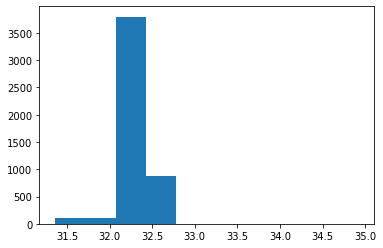

In [ ]:
#Detecting outliers in latitude column
plt.hist(df.latitude)
plt.show()

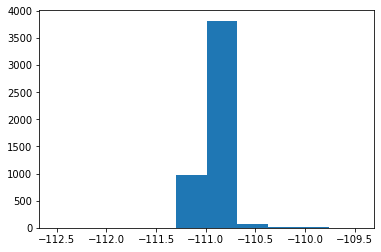

In [ ]:
#Detecting outliers in longitude column
plt.hist(df.longitude)
plt.show()

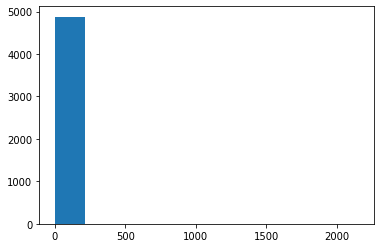

In [ ]:
#Detecting outliers in lot acres
plt.hist(df.lot_acres)
plt.show()

In [ ]:
#number of records where value of lot_acres is greater than 100
 (df[df['lot_acres'] > 100]).shape

(21, 15)

In [ ]:
#subset of records where values of lot_acres is greater than 100
(df[df['lot_acres'] > 100])

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10,10500.0,0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0.0
1,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2,7300.0,0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0.0
2,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3,0.0,0,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",0.0
3,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5,9019.0,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",0.0
10,2776518.0,85640,-111.045441,31.562121,147.18,7330.36,1935,5,5,5067.0,5,"Freezer, Refrigerator, Appliance Color: Stainl...",5,"Concrete, Natural Stone, Wood",0.0
29,2500000.0,85609,-110.095713,32.057222,1048.18,2441.60,1985,2,2,2895.0,0,"Refrigerator, Oven",1,"Carpet, Mexican Tile, Other",0.0
38,2200000.0,85640,-111.043773,31.562102,147.18,3902.00,1935,5,5,4317.0,5,"Dishwasher, Freezer, Garbage Disposal, Refrige...",4,"Ceramic Tile, Mexican Tile",0.0
61,2000000.0,85715,-110.862142,32.264695,103.00,7069.16,1967,3,5,3969.0,3,"Dishwasher, Double Sink, Freezer, Garbage Disp...",1,Wood,0.0
62,1295000.0,85637,-110.683575,31.684722,273.03,8411.94,1995,3,4,2681.0,6,Dishwasher,1,Mexican Tile,0.0
101,1450000.0,85624,-110.738083,31.533643,164.30,0.00,1997,1,1,3576.0,0,Missing: All Appliances,0,Concrete,0.0


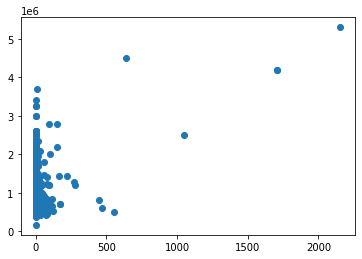

In [ ]:
#plot to demonstrate the relationship between the lot_acres and the sold price
plt.scatter(df.lot_acres, df.sold_price,)
plt.show()

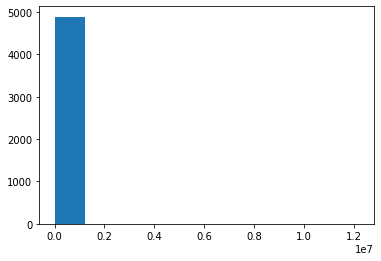

In [ ]:
#Detecting outliers in tax
plt.hist(df.taxes)
plt.show()

In [ ]:
#number of records where tax is greater than 0.2^7
(df[df['taxes'] > 2000000]).shape

(1, 15)

In [ ]:
#subset of records where tax is greater than 0.2^7
(df[df['taxes'] > 2000000])

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
715,1040000.0,85718,-110.909653,32.301099,1.43,12215075.0,1987,4,4,5729.0,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",3,"Ceramic Tile, Natural Stone",193.0


In [ ]:
#size of dataset
df.shape

(4890, 15)

In [ ]:
#dropping the record with tax outlier
df = df.drop(df[(df.taxes > 2000000) ].index)

In [ ]:
#size of dataset
df.shape

(4889, 15)

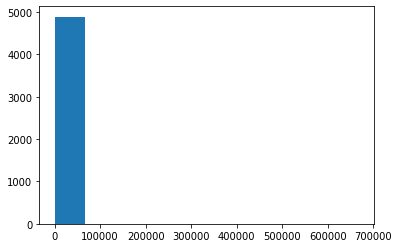

In [ ]:
#Detecting outliers in tax
plt.hist(df.taxes)
plt.show()

In [ ]:
#number of records where tax is greater than 100000
(df[df['taxes'] > 100000]).shape

(1, 15)

In [ ]:
#subset of records where tax is greater than 100000
(df[df['taxes'] > 100000])

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
1135,885000.0,85718,-110.92421,32.309002,1.2,668059.0,2003,4,3,3650.0,3,"Dishwasher, Double Sink, Electric Range, Garba...",2,"Carpet, Natural Stone, Other: Travertine",0.0


In [ ]:
#dropping the record with tax outlier
df = df.drop(df[(df.taxes > 100000) ].index)

In [ ]:
#size of dataset
df.shape

(4888, 15)

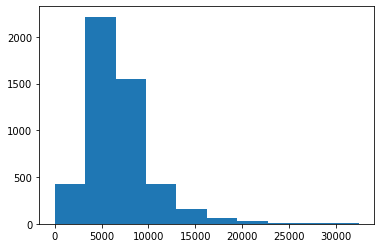

In [ ]:
#Detecting outliers in tax
plt.hist(df.taxes)
plt.show()

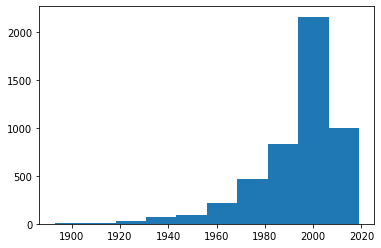

In [ ]:
#Detecting outliers in year_built
plt.hist(df.year_built)
plt.show()

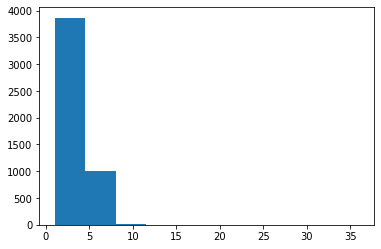

In [ ]:
#Detecting outliers in bedrooms
plt.hist(df.bedrooms)
plt.show()

In [ ]:
#subset of records where number of bedrooms is greater than 15
(df[df['bedrooms'] > 15])

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
635,895000.0,85749,-110.799667,32.253627,11.57,26110.00,1948,19,18,12154.0,0,"Dishwasher, Garbage Disposal, Pantry: Walk-In,...",3,"Carpet, Mexican Tile, Other: Multiple Types",0.0
969,950000.0,85712,-110.894127,32.238608,0.49,2623.23,1953,18,14,2850.0,0,0,0,Carpet,0.0
2106,550000.0,85645,-111.047608,31.700763,50.00,25113.45,1936,36,35,0.0,0,Prep Sink,1,"Ceramic Tile, Mexican Tile",0.0
2111,550000.0,85645,-111.047350,31.701117,50.00,25113.45,1936,36,35,22408.0,0,Countertops: Stainless,1,"Ceramic Tile, Mexican Tile",0.0
3277,695000.0,85645,-111.047260,31.701407,50.00,6520.66,1936,36,35,21915.0,0,Refrigerator,1,"Ceramic Tile, Mexican Tile",0.0


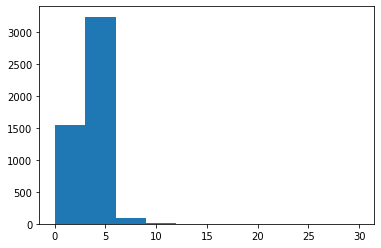

In [ ]:
#Detecting outliers in garage
plt.hist(df.garage)
plt.show()

In [ ]:
#number of records where number of garages is greater than 6
(df[df['garage'] > 6]).shape

(45, 15)

In [ ]:
#Assumption: The number of garages will not exceed twice the number of bedrooms. e.g: if a house has 4 bedrooms, the number of garages will not be more than 8.

#number of records where number of garages are greater than twice the number of bedrooms
(df[((df['garage']) > (2*(df['bedrooms'])))])

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
140,1695000.0,85742,-111.034883,32.441422,4.58,19488.82,2004,6,6,6923.0,15,"Dishwasher, Double Sink, Garbage Disposal, Ind...",5,Natural Stone,0.0
287,910000.0,85637,-110.742582,31.631884,58.00,4630.00,1987,3,3,3440.0,7,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",3,"Carpet, Ceramic Tile, Mexican Tile",130.0
839,940000.0,85755,-111.011025,32.442192,7.22,14127.99,1997,4,3,4797.0,9,"Dishwasher, Garbage Disposal, Refrigerator",4,"Natural Stone, Wood",41.0
905,825000.0,85745,-111.103561,32.264041,24.92,16165.77,2005,5,6,5937.0,22,"Dishwasher, Garbage Disposal, Microwave, Oven",3,"Carpet, Concrete",0.0
913,920000.0,85742,-111.073328,32.409550,1.16,6574.74,2010,4,5,5041.0,9,"Dishwasher, Double Sink, Freezer, Garbage Disp...",4,"Carpet, Ceramic Tile",0.0
1304,820000.0,85755,-111.000147,32.441730,7.27,10235.00,1981,3,4,2853.0,9,"Compactor, Dishwasher, Garbage Disposal, Refri...",2,"Carpet, Mexican Tile",42.0
1395,834500.0,85755,-110.998048,32.445990,8.11,6551.00,1985,3,4,2969.0,8,"Dishwasher, Garbage Disposal, Microwave, Oven",2,"Mexican Tile, Natural Stone",42.0
1505,817034.0,85755,-110.984403,32.464579,0.24,416.45,2016,2,3,2880.0,30,"Dishwasher, Freezer, Garbage Disposal, Refrige...",0,"Carpet, Ceramic Tile",167.0
1560,785000.0,85749,-110.756365,32.268453,8.77,9313.08,1975,4,3,3598.0,12,"Compactor, Desk, Dishwasher, Double Sink, Elec...",3,"Carpet, Ceramic Tile",0.0
2713,685000.0,85749,-110.755687,32.303589,3.31,6845.07,2003,3,4,2854.0,12,"Dishwasher, Electric Range, Garbage Disposal, ...",1,"Carpet, Ceramic Tile, Wood",0.0


In [ ]:
#size of dataset
df.shape

(4888, 15)

In [ ]:
#dropping the record with ridiculous garage:bedroom ratio
df = df.drop(df[((df['garage']) > (3*(df['bedrooms']))) ].index)

In [ ]:
#size of dataset
df.shape

(4883, 15)

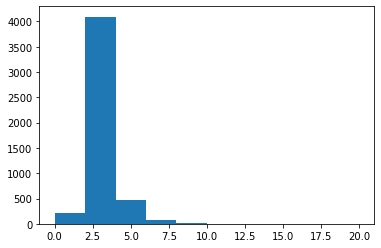

In [ ]:
#Detecting outliers in garage
plt.hist(df.garage)
plt.show()

In [ ]:
#subset of records where number of garages are more than 10
(df[df['garage'] > 10])

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
140,1695000.0,85742,-111.034883,32.441422,4.58,19488.82,2004,6,6,6923.0,15,"Dishwasher, Double Sink, Garbage Disposal, Ind...",5,Natural Stone,0.0
1560,785000.0,85749,-110.756365,32.268453,8.77,9313.08,1975,4,3,3598.0,12,"Compactor, Desk, Dishwasher, Double Sink, Elec...",3,"Carpet, Ceramic Tile",0.0
3974,540000.0,85749,-110.780466,32.251520,1.49,4034.02,1989,4,4,3033.0,11,"Dishwasher, Double Sink, Garbage Disposal, Laz...",1,Natural Stone,0.0
4455,550000.0,85730,-110.756556,32.181148,9.10,6656.60,1960,7,5,4072.0,20,"Compactor, Dishwasher, Garbage Disposal, Refri...",2,"Carpet, Ceramic Tile, Mexican Tile, Other",0.0


In [ ]:
#view dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4883 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sold_price        4883 non-null   float64
 1   zipcode           4883 non-null   int64  
 2   longitude         4883 non-null   float64
 3   latitude          4883 non-null   float64
 4   lot_acres         4883 non-null   float64
 5   taxes             4883 non-null   float64
 6   year_built        4883 non-null   int64  
 7   bedrooms          4883 non-null   int64  
 8   bathrooms         4883 non-null   int64  
 9   sqrt_ft           4883 non-null   float64
 10  garage            4883 non-null   int64  
 11  kitchen_features  4883 non-null   object 
 12  fireplaces        4883 non-null   int64  
 13  floor_covering    4883 non-null   object 
 14  HOA               4883 non-null   float64
dtypes: float64(7), int64(6), object(2)
memory usage: 610.4+ KB


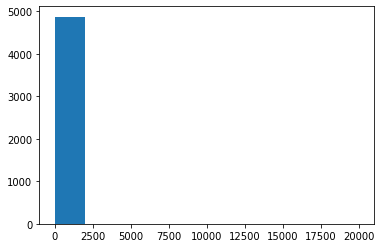

In [ ]:
#Detecting outliers in HOA
plt.hist(df.HOA)
plt.show()

In [ ]:
#subset of records where HOA value is greater than 2500
(df[df['HOA'] > 2500])

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
14,3000000.0,85739,-110.883068,32.508778,0.00,29669.00,2008,3,3,3095.0,0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",3,"Natural Stone, Wood",20000.0
53,2150000.0,85739,-110.883660,32.509721,0.00,19060.81,2008,2,3,2729.0,0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",2,"Natural Stone, Wood",20000.0
257,1494392.0,85755,-110.987649,32.461126,1.85,3330.03,2017,3,4,3339.0,3,"Dishwasher, Garbage Disposal",1,"Carpet, Natural Stone",19480.0
2860,606500.0,85629,-110.960680,31.867265,0.17,792.22,2014,5,5,4019.0,3,"Compactor, Dishwasher, Double Sink, Electric R...",1,"Carpet, Ceramic Tile, Natural Stone, Wood",5900.0
2938,655000.0,85614,-110.971212,31.835114,1.50,6433.00,2001,3,4,3633.0,3,"Dishwasher, Double Sink, Electric Range, Garba...",2,"Carpet, Ceramic Tile",8333.0


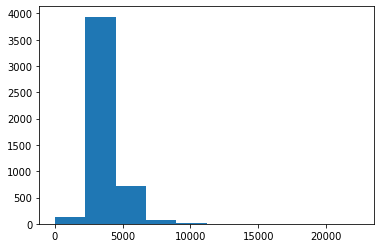

In [ ]:
#Detecting outliers in sq_ft
plt.hist(df.sqrt_ft)
plt.show()

In [ ]:
#drop records with 0 sq ft
df = df.drop(df[((df.sqrt_ft.astype(int)) == 0)].index)

In [ ]:
#size of dataset
df.shape

(4856, 15)

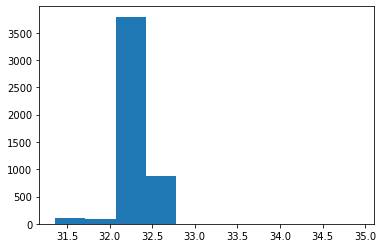

In [ ]:
#Detecting outliers in longitude
plt.hist(df.latitude)
plt.show()

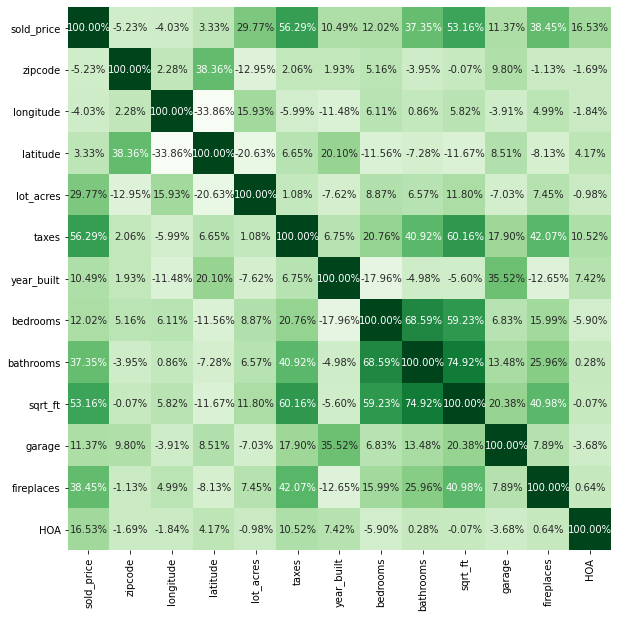

In [ ]:
#Plotting the heatmap of correlation
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=False, square=True, fmt = '.2%', annot=True, cmap='Greens')

In [ ]:
#Creating a subset with highly correlated features only

df1 = df[['taxes', 'longitude', 'latitude', 'bathrooms', 'sqrt_ft', 'fireplaces']]

**Tax Ranges** based on Geographical Location

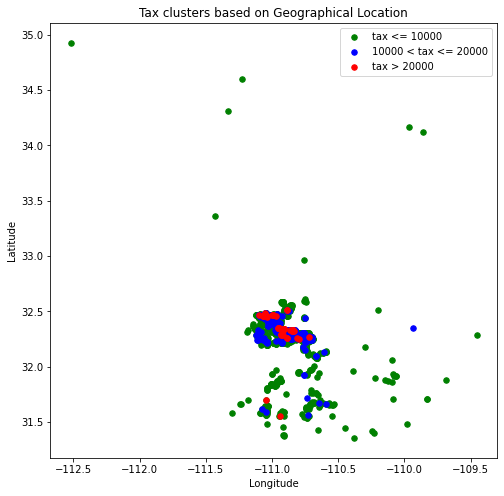

In [ ]:
#Creating ranges of latitude and longitude values to cluster coordinates into three groups each
lowLat=df1['latitude'][df1['taxes']<=10000]
lowLong=df1['longitude'][df1['taxes']<=10000]
medLat=df1['latitude'][(df1['taxes']>10000)&(df1['taxes']<=20000)]
medLong=df1['longitude'][(df1['taxes']>10000)&(df1['taxes']<=20000)]
highLat=df1['latitude'][df1['taxes']>20000]
highLong=df1['longitude'][df1['taxes']>20000]

#Plotting the various coordinates from the dataset
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111)

ax1.scatter(lowLong,lowLat, s=30, c='g', label='tax <= 10000')
ax1.scatter(medLong,medLat, s=30, c='b', label='10000 < tax <= 20000')
ax1.scatter(highLong,highLat, s=30, c='r', label='tax > 20000')

plt.legend(loc='upper right');
plt.title('Tax clusters based on Geographical Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [ ]:
#Normalizing the Data
normalized_latitude = (df1.latitude-min(df1.latitude))/(max(df1.latitude)-min(df1.latitude))
normalized_longitude = (df1.longitude-min(df1.longitude))/(max(df1.longitude)-min(df1.longitude))

In [ ]:
#Creating a column for tax/sq_ft to create bin categories
df1['tax/sq_ft'] = (df1['taxes'] / df1['sqrt_ft'])

In [ ]:
#Categorizing the tax/sqft
df1['ts_cat'] = (df1['tax/sq_ft']).astype(int)

In [ ]:
#Removing outliers in tax category 
df1 = df1[(df1.ts_cat >= 1) & (df1.ts_cat <= 20) ]

In [ ]:
#Creating a subset for analysis with required columns only
df1 = df1[['tax/sq_ft', 'ts_cat' , 'longitude', 'latitude', 'bathrooms', 'fireplaces']]

###Data Splitting

In [ ]:
# Shuffle your dataset 
shuffle_df = df1.sample(frac=1)

# Define a size for your train set 
train_size = int(0.8* len(df1))
val_size = int(0.1* len(df1))
test_size = int(0.1* len(df1))

# Split your dataset 
train_df = shuffle_df[:train_size]
val_df = shuffle_df[train_size:(train_size+val_size)]
test_df = shuffle_df[(train_size+val_size):]

In [ ]:
#size of training set
train_df.shape

(3537, 6)

In [ ]:
#size of testing set
test_df.shape

(443, 6)

In [ ]:
#size of validation set
val_df.shape

(442, 6)

In [ ]:
train_df = train_df[['ts_cat', 'tax/sq_ft' ,'longitude', 'latitude', 'bathrooms', 'fireplaces']]

In [ ]:
train_df

,ts_cat,tax/sq_ft,longitude,latitude,bathrooms,fireplaces
2723,2,2.124366,-110.991533,32.402096,4,1
2662,1,1.996536,-110.964501,32.404905,3,1
4710,1,1.383593,-110.869289,32.286358,3,2
4479,2,2.424846,-111.090181,32.314732,3,2
2046,1,1.909699,-110.924829,32.334024,4,3
...,...,...,...,...,...,...
3576,1,1.988081,-110.797520,32.252505,6,3
1563,2,2.452341,-110.947097,32.415886,3,3
1102,1,1.850012,-110.761894,32.300581,4,2
331,3,3.131415,-110.738810,32.271496,3,1


In [ ]:
#Creating an array of X and y values to compute into models from the shuffled dataset

X = (shuffle_df[['longitude', 'latitude']]).to_numpy()
y = ((shuffle_df['ts_cat']).to_numpy())

##***MODELLING KNN CLASSIFICATION TO CLUSTER BASED ON GEOGRAPHICAL LOCATION***

In [ ]:
#Building a KNN model from scratch

class KNNCLassifier():
  def fit(self, X, y):
    self.X = X
    self.y = y
  
  def predict(self, X, K, epsilon = 1e-4):
    N=len(X)
    y_hat = np.zeros(N)

    for i in range (N):
      dist2 = np.sum((self.X-X[i])**2, axis=1)
      idxt = np.argsort(dist2)[:K]
      gamma_k = 1/(np.sqrt(dist2[idxt])+epsilon)
      y_hat[i] = np.bincount(self.y[idxt], weights=gamma_k).argmax()
    
    return y_hat

In [ ]:
#Fitting the model
knn = KNNCLassifier()
knn.fit(X,y)


In [ ]:
#Predicting the fitted model
y_hat = knn.predict(X, 50)

In [ ]:
#Function to calculate accuracy
def accuracy (y, y_hat):
  return np.mean( y == y_hat)

print(f"Accuracy: {accuracy(y, y_hat):0.3f}")

Accuracy: 0.969


Text(0.5, 15.0, 'Predicted Label')

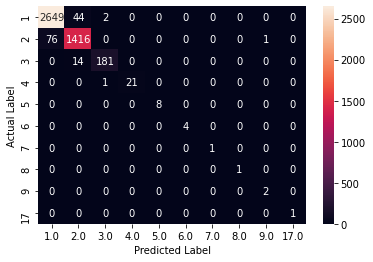

In [ ]:
#Plotting a confusion matrix of the actual and predicted values
plt.figure()
actual = pd.Series(y, name="Actual")
predicted = pd.Series(y_hat, name="Predicted")

confusion_matrix = pd.crosstab(actual, predicted)
ap_matrix = sns.heatmap(confusion_matrix, annot=True, fmt="d")

plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")

In [ ]:
#Creating a subset with the bin category column only from the predicted set
bc_df = pd.DataFrame(y_hat, columns=['bin_cat']) 

In [ ]:
#Creating a subset of required columns from the training set
r_df = (train_df[['tax/sq_ft','bathrooms', 'fireplaces']])

In [ ]:
#Mapping the relevant value from the bc_df dataset into the r_df dataset
r_df['bin_cat'] = bc_df.loc[:3536, 'bin_cat'].values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
r_df

,tax/sq_ft,bathrooms,fireplaces,bin_cat
2723,2.124366,4,1,2.0
2662,1.996536,3,1,1.0
4710,1.383593,3,2,1.0
4479,2.424846,3,2,2.0
2046,1.909699,4,3,1.0
...,...,...,...,...
3576,1.988081,6,3,1.0
1563,2.452341,3,3,2.0
1102,1.850012,4,2,1.0
331,3.131415,3,1,3.0


##***MODELLING LINEAR REGRESSION FOR PREDICTION USING FACTORS***

In [ ]:
#Creating x and y variables from the r_df dataset for prediction
X = r_df[['bin_cat','bathrooms','fireplaces']]
y = r_df['tax/sq_ft']

In [ ]:
#Building a function for OLS REGRESSION WITH GRADIENT DESCENT and for computing R-squared value from scratch

def OLS(Y, Y_hat, N):
  return (1/(2*N)*np.sum((Y-Y_hat)**2))

def R2(Y, Y_hat):
  return (1-(np.sum((Y-Y_hat)**2)/np.sum((Y-np.mean(Y))**2)))

In [ ]:
#Building a Regression model from scratch
class OURLinearRegression():
  def fit(self, X, y, epochs=1e3, eta=1e-3, show_curve = False, lambd=0, p=1):

    epochs=int(epochs)
    
    N,D = X.shape
    Y = y
    self.W = np.random.randn(D)
    J = np.zeros(epochs)

    for epoch in range(epochs):
      Y_hat = self.predict(X)
      J[epoch]=OLS(Y,Y_hat,N)+(lambd/(p*N))*np.linalg.norm(self.W, ord=p, keepdims=True)
      self.W -= eta*(1/N)*(X.T@(Y_hat-Y)+(1/N)*(lambd*np.abs(self.W)**(p-1)*np.sign(self.W)))

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel('epochs')
      plt.ylabel("$\matchcal{J}")
      plt.title("Training Curve")
      plt.show()
  
  def predict(self,X):
    return X@self.W

In [ ]:
myReg = OURLinearRegression()

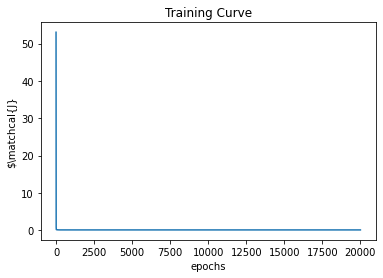

In [ ]:
#Fitting the regression model
myReg.fit(X,y,epochs=2e4, eta=1e-2,show_curve=True)

In [ ]:
#Predicting the fitted model
y_hat3 = myReg.predict(X)

In [ ]:
#Calculating the R-squared value
R2(y, y_hat3)

0.7286437485235834

### Validation

In [ ]:
r_df_val = (val_df[['tax/sq_ft','bathrooms', 'fireplaces']])

In [ ]:
r_df_val['bin_cat'] = bc_df.loc[3537:3978,'bin_cat'].values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
X_val = r_df_val[['bin_cat', 'bathrooms', 'fireplaces']]
y_val = r_df_val['tax/sq_ft']

In [ ]:
y_hat_r_val = myReg.predict(X_val)

In [ ]:
R2(y_val, y_hat_r_val)

0.6582228966141195

###Test

In [ ]:
r_df_test = (test_df[['tax/sq_ft','bathrooms', 'fireplaces']])

In [ ]:
r_df_test['bin_cat'] = bc_df.loc[3979:4421, 'bin_cat'].values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
X_test = r_df_test[['bin_cat', 'bathrooms', 'fireplaces']]
y_test = r_df_test['tax/sq_ft']

In [ ]:
y_hat_r_test = myReg.predict(X_test)

In [ ]:
R2(y_test, y_hat_r_test)

0.701193175214647

##**DATA POINT TESTING**

In [ ]:
#Data points that can be changed accordingly
longitude = -112.201640
latitude = 33.704060
sq_ft = 2947
bathroom = 3
fireplace = 1


In [ ]:
X = (longitude, latitude)

In [ ]:
y_hat = knn.predict(X, 50)

In [ ]:
y_hat

array([1., 1.])

In [ ]:
X_test = (y_hat, bathroom, fireplace)


In [ ]:
y_hat_r_test = myReg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
y_hat_r_test

array([1.34521247, 1.34521247])

In [ ]:
#Calculating the tax for the given data points
tax = y_hat_r_test[0] * sq_ft
tax

3964.34113495903